In [2]:
%matplotlib inline
import geopandas as gpd
import requests, pandas as pd
from shapely.geometry import Point

In [3]:
state_df = gpd.read_file("data/cb_2015_us_state_20m.shp")
state_df.set_index(state_df["NAME"].astype(str), inplace = True)
state_df.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
NAME,,,,,,,,,,
Texas,0400000US48,676634395761,19027462392,48,00,Texas,48,01779801,TX,"POLYGON ((-106.623445 31.914034, -106.630114 3..."
California,0400000US06,403488955894,20477992907,06,00,California,06,01779778,CA,"(POLYGON ((-118.593969 33.467198, -118.484785 ..."
Kentucky,0400000US21,102266253024,2389483091,21,00,Kentucky,21,01779786,KY,"POLYGON ((-89.544434 36.57451, -89.47934599999..."
Georgia,0400000US13,149169759045,4740824950,13,00,Georgia,13,01705317,GA,"POLYGON ((-85.605165 34.984678, -85.4743388431..."
Wisconsin,0400000US55,140269484183,29365442607,55,00,Wisconsin,55,01779806,WI,"(POLYGON ((-86.934276 45.421149, -86.835748999..."


In [4]:
contiguous =  (state_df.index != "Puerto Rico")
contiguous &= (state_df.index != "Hawaii")
contiguous &= (state_df.index != "Alaska")
contiguous &= (state_df.index != "District of Columbia")
state_df = state_df[contiguous]

In [5]:
cities_df = pd.read_csv("data/Locations.csv")
cities_df.head()

,NAME,Longitude,Latitude,Vote
0,Alabama,-86.300942,32.377447,1
1,Arizona,-112.097094,33.448097,1
2,Arkansas,-92.288761,34.746758,1
3,California,-121.493411,38.576572,2
4,Colorado,-104.984897,39.739094,2


In [6]:
geometry = [Point(xy) for xy in zip(cities_df.Longitude, cities_df.Latitude)]
cities_coords = gpd.GeoDataFrame(cities_df, crs = state_df.crs, geometry=geometry)
cities_coords.head()

,NAME,Longitude,Latitude,Vote,geometry
0,Alabama,-86.300942,32.377447,1,POINT (-86.30094200000001 32.377447)
1,Arizona,-112.097094,33.448097,1,POINT (-112.097094 33.448097)
2,Arkansas,-92.288761,34.746758,1,POINT (-92.28876099999999 34.746758)
3,California,-121.493411,38.576572,2,POINT (-121.493411 38.576572)
4,Colorado,-104.984897,39.739094,2,POINT (-104.984897 39.739094)


In [7]:
located_cities = gpd.sjoin(cities_coords, state_df, how = 'left', op='within')
located_cities.set_index(cities_coords["NAME"].astype(str), inplace = True)
located_cities.head()

,NAME_left,Longitude,Latitude,Vote,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME_right,STATEFP,STATENS,STUSPS
NAME,,,,,,,,,,,,,,,
Alabama,Alabama,-86.300942,32.377447,1,POINT (-86.30094200000001 32.377447),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,Arizona,-112.097094,33.448097,1,POINT (-112.097094 33.448097),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,Arkansas,-92.288761,34.746758,1,POINT (-92.28876099999999 34.746758),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,California,-121.493411,38.576572,2,POINT (-121.493411 38.576572),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colorado,Colorado,-104.984897,39.739094,2,POINT (-104.984897 39.739094),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
contiguous =  (located_cities.Vote != 2)
located_cities = located_cities[contiguous]

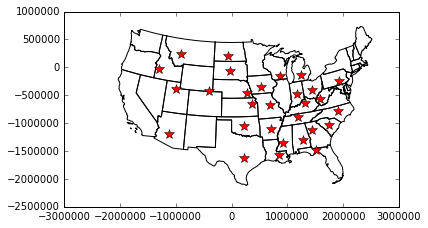

In [10]:
base =state_df.to_crs(epsg=2163).plot(color="white")
located_cities.to_crs(epsg=2163).plot(ax=base, marker='*', color='red', markersize=10)

In [11]:
newstrump_df = pd.read_csv("trump_tweets.csv", index_col = "NAME")
newstrump_df.head()

,NEWSPAPER,TWITTER_USER,11/22/16,11/23/16,11/24/16,11/25/16,11/26/16,TOTAL_TRUMP
NAME,,,,,,,,
Alabama,The Dothan Eagle,dothaneagle,1,0,0,0,0,1
Arizona,Arizona Daily Star,TucsonStar,1,0,0,1,3,5
Arkansas,Southwest Times Record,TimesRecord,1,3,0,1,0,5
California,San Francisco Chronicle,sfchronicle,23,24,9,6,12,74
Colorado,The Gazette,csgazette,7,3,3,8,3,24


In [12]:
geo_mergeT = state_df.join(newstrump_df, how = "inner")
geo_mergeT.head(5)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,NEWSPAPER,TWITTER_USER,11/22/16,11/23/16,11/24/16,11/25/16,11/26/16,TOTAL_TRUMP
NAME,,,,,,,,,,,,,,,,,,
Alabama,0400000US01,131173369432,4593984687,01,00,Alabama,01,01779775,AL,"POLYGON ((-88.46866248405129 31.8938557116156,...",The Dothan Eagle,dothaneagle,1,0,0,0,0,1
Arizona,0400000US04,294204474990,1027559124,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.799683 32.593621, -114.809393 3...",Arizona Daily Star,TucsonStar,1,0,0,1,3,5
Arkansas,0400000US05,134769279101,2962525273,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.617919 36.499414, -94.3612029999...",Southwest Times Record,TimesRecord,1,3,0,1,0,5
California,0400000US06,403488955894,20477992907,06,00,California,06,01779778,CA,"(POLYGON ((-118.593969 33.467198, -118.484785 ...",San Francisco Chronicle,sfchronicle,23,24,9,6,12,74
Colorado,0400000US08,268428431772,1175462574,08,00,Colorado,08,01779779,CO,"POLYGON ((-109.059962 38.499987, -109.05996197...",The Gazette,csgazette,7,3,3,8,3,24


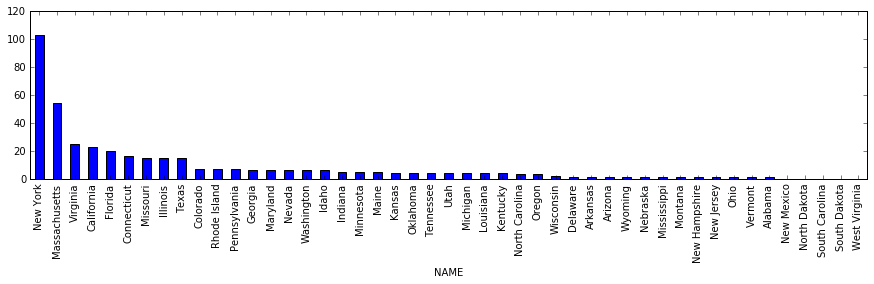

In [16]:
geo_mergeT.set_index("NAME")["11/22/16"].sort_values(ascending = False).plot(kind = "bar", figsize = (15, 3))

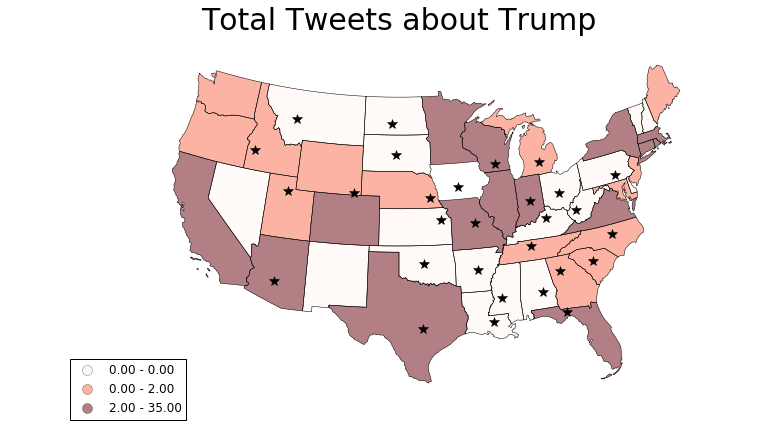

In [24]:
base =geo_mergeT.to_crs(epsg=2163).plot(column = "11/26/16", scheme = "quantiles", k = 3, cmap = "Reds", legend = True,
                 alpha = 0.5, linewidth = 0.5, figsize = (12, 8))
located_cities.to_crs(epsg=2163).plot(ax=base, marker='*', color='black', markersize=10, legend = "Republican")

base.set_title("Total Tweets about Trump", fontsize = 30)
base.set_axis_off()
base.get_figure().savefig('Trump26.png')

In [25]:
newshillary_df = pd.read_csv("hillary_tweets.csv", index_col = "NAME")
newshillary_df.head()

,NEWSPAPER,TWITTER_USER,11/22/16,11/23/16,11/24/16,11/25/16,11/26/16,TOTAL_HILLARY
NAME,,,,,,,,
Alabama,The Dothan Eagle,dothaneagle,0,0,0,0,0,0
Arizona,Arizona Daily Star,TucsonStar,0,0,0,0,3,3
Arkansas,Southwest Times Record,TimesRecord,0,0,0,0,0,0
California,San Francisco Chronicle,sfchronicle,0,0,0,0,3,3
Colorado,The Gazette,csgazette,1,0,1,0,1,3


In [27]:
geo_mergeH = state_df.join(newshillary_df, how = "inner")
geo_mergeH.head(5)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,NEWSPAPER,TWITTER_USER,11/22/16,11/23/16,11/24/16,11/25/16,11/26/16,TOTAL_HILLARY
NAME,,,,,,,,,,,,,,,,,,
Alabama,0400000US01,131173369432,4593984687,01,00,Alabama,01,01779775,AL,"POLYGON ((-88.46866248405129 31.8938557116156,...",The Dothan Eagle,dothaneagle,0,0,0,0,0,0
Arizona,0400000US04,294204474990,1027559124,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.799683 32.593621, -114.809393 3...",Arizona Daily Star,TucsonStar,0,0,0,0,3,3
Arkansas,0400000US05,134769279101,2962525273,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.617919 36.499414, -94.3612029999...",Southwest Times Record,TimesRecord,0,0,0,0,0,0
California,0400000US06,403488955894,20477992907,06,00,California,06,01779778,CA,"(POLYGON ((-118.593969 33.467198, -118.484785 ...",San Francisco Chronicle,sfchronicle,0,0,0,0,3,3
Colorado,0400000US08,268428431772,1175462574,08,00,Colorado,08,01779779,CO,"POLYGON ((-109.059962 38.499987, -109.05996197...",The Gazette,csgazette,1,0,1,0,1,3


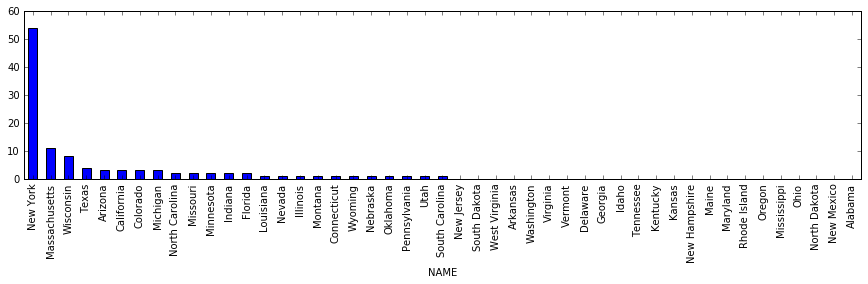

In [28]:
geo_mergeH.set_index("NAME")["TOTAL_HILLARY"].sort_values(ascending = False).plot(kind = "bar", figsize = (15, 3))

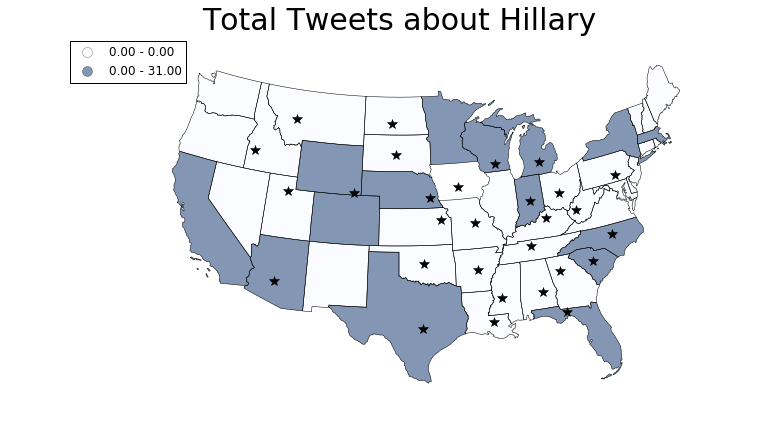

In [34]:
base =geo_mergeH.to_crs(epsg=2163).plot(column = "11/26/16", scheme = "quantiles", k = 3, cmap = "Blues", legend = True,
                 alpha = 0.5, linewidth = 0.5, figsize = (12, 8))
located_cities.to_crs(epsg=2163).plot(ax=base, marker='*', color='black', markersize=10, legend = "Republican")

base.set_title("Total Tweets about Hillary", fontsize = 30)
base.set_axis_off()
base.get_figure().savefig('Hillary26.png')